In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt
from scipy import stats
import openpyxl

In [183]:
# find difference between 2 dates in months

def month_diff(x,y):
    end = x.dt.to_period('M').view(dtype='int64')
    start = y.dt.to_period('M').view(dtype='int64')
    return end - start

def month_diff1(x,y):
    return ((x - y)/np.timedelta64(1, 'M'))

def sig(x):
    return (1/(1+(2.718**-x)))

In [205]:
df = pd.read_excel('Transfer Order by Product4_8_2022 4 31 57 PM.xlsx', header=4)
df.columns = [i.lower() for i in df.columns]
df.columns = df.columns.str.replace(' ','_')
df.rename(columns={'value_in_base_currency':'sales','sales_person_name':'sales_rep',
                   'sales_order_date':'date'}, inplace=True)
df.date = pd.to_datetime(df.date, format='%d-%m-%Y')
df.account= [' '.join(i.split()) for i in df.account]
df.product_code=[' '.join(i.split()) for i in df.product_code]

## Find out new customers
### Criteria: (1). Those who purchase products only one time (2). Those who has at least 12 months gap between purchases.

In [247]:
cty='Philippines'

df = df[['date','account','product_code','product_name','sales_rep','sales','country']]
_ = df[df.country==cty]


_['current_date']=pd.to_datetime('today')
_['since_last']=month_diff(_.current_date, _.date)
_ = _[_.since_last<=18]


# groupby to eliminate purchases of the same product on the same date

frq =_.groupby(['date','account','product_code','product_name','sales_rep','country'])['since_last'].mean().reset_index()

# # repeat customers 

# repeat = _[_[['account','product_code']].duplicated(keep=False)]

# # new customers buying for the first time

new = _[~_[['account','product_code']].duplicated(keep=False)]

In [250]:
# sort according to account, product code and date

frq=frq.sort_values(['account','product_code','date',],ascending=False)
frq=frq.reset_index(drop=True)

In [252]:
# extract customers who purchase the same product at different times

frq1 = frq[frq[['account','product_code']].duplicated(keep=False)]

In [262]:
new2=pd.DataFrame()
ee = list()
for i,j in zip(frq1.account, frq1.product_code):

    if j in ee:
        continue
        
    else:
        aa = frq1[(frq1.account==i) & (frq1.product_code==j)].head(2)
        bb = aa.iloc[0,0]
        cc = aa.iloc[1,0]
        dd = month_diff1(bb,cc)
        dd = int(dd)
        if dd > 12:
            new2=new2.append(aa.head(1))
        ee.append(j)

In [263]:
# new customers

new2

,date,account,product_code,product_name,sales_rep,country,since_last
113,2021-11-20,Wildane Cajote-Florendo Dental Clinic,900834,everStick C&B 1 x 8 cm,Jonathan Familar,Philippines,5
452,2022-02-10,Tolentino Dental,0138F289,Gold Label I Capsule,Carlo Molina,Philippines,2
628,2022-02-24,TLA Dental Clinic,0136F032,G-CEM LinkForce Starter Kit,Darlene Dela Fuente,Philippines,2


In [264]:
# those who purchase only one time

new_cust = pd.concat([new2,new])
new_cust = new_cust.sort_values(['account','product_code','date'], ascending=False)
new_cust

,date,account,product_code,product_name,sales_rep,country,since_last,sales,current_date
8473,2021-12-14,straighteeth,0135F225,Solare X 2mL,Randy Santos,Philippines,4,296.00,2022-04-10 20:00:58.216830
13012,2021-10-12,metropolitan oral surgery program,0126F055,Dry Mouth Gel,Randy Santos,Philippines,6,157.00,2022-04-10 20:00:58.216830
29740,2021-07-19,jackie Lou Danao-Ah Dental,750000,Flexceed Kit,Randy Santos,Philippines,9,162.33,2022-04-10 20:00:58.216830
20835,2021-05-17,jackie Lou Danao-Ah Dental,0138F282,G-Premio Bond Refill,Randy Santos,Philippines,11,198.67,2022-04-10 20:00:58.216830
20836,2021-05-17,jackie Lou Danao-Ah Dental,0135F225,Solare X 2mL,Randy Santos,Philippines,11,230.00,2022-04-10 20:00:58.216830
4815,2022-02-08,i Smile Dental Health Clinic,0140F107,G-CEM One Starter Kit,Jonathan Familar,Philippines,2,326.67,2022-04-10 20:00:58.216830
2410,2022-03-01,i DCinci Dental Clinic,0138F290,Gold Label VII EP Capsule,Darlene Dela Fuente,Philippines,1,155.00,2022-04-10 20:00:58.216830
5217,2022-01-28,i DCinci Dental Clinic,0131F163,GC Gold Label 9 Extra 1-1,Darlene Dela Fuente,Philippines,3,154.33,2022-04-10 20:00:58.216830
20907,2021-05-18,global dental clinic,750000,Flexceed Kit,Randy Santos,Philippines,11,162.33,2022-04-10 20:00:58.216830
2393,2022-03-07,global dental clinic,462032,Tooth Mousse Assorted,Randy Santos,Philippines,1,363.00,2022-04-10 20:00:58.216830


## compute dataframe of CLTV and customers with purchases since last 6 months

In [54]:
def consolidate(cty):

    # frequency of purchase -------------------------------------------------------------------------------

    _ = df[df.country==cty]

    freq_df = _.groupby('account').size().reset_index().rename(columns={0:'freq'})

    # average customer frequency of purchase

    ave_freq = freq_df.freq.mean()

    # create dataframe for cltv freq

    freq_df['cltv_freq']=[sig(x/ave_freq) for x in freq_df.freq]

    # reindex and realign

    freq_df=freq_df.sort_values('account').reset_index(drop=True)
    
    
    
    
    # find out recency --------------------------------------------------------------------------------------
    
    # copy to new dataframe

#     _=df.copy()
#     _=_[_.country==cty]

    # compute number of days from last purchase

    _['current_date']=pd.to_datetime('today')
    _['since_last']=month_diff(_.current_date,_.date)

    # create new dataframe to compute most recent purchase date

    recency_df = _.groupby(['account','country'])['since_last'].min().reset_index().rename(columns=
                                                                                            {'since_last':'most_recent'})


    # working around for zeros

    ave_recency = recency_df.most_recent.mean()+1


    # increase most_recent values by 1 due to zero

    recency_df['most_recent_']=[(i+1)/ave_recency for i in recency_df.most_recent]


    recency_df['cltv_recency']=[sig(1/i) for i in recency_df.most_recent_]


    # sort dataframe according to account name

    recency_df=recency_df.sort_values('account').reset_index(drop=True)
    
    
    
    # find out monetary value ----------------------------------------------------------------------------------------
    
    # groupby account to compute total sales for each account

    tot_sales = _.groupby('account')['sales'].sum().reset_index().rename(columns={'sales':'total_sales'})

    # compute average sales

    ave_sales = tot_sales.total_sales.mean()

    # compute cltv for sales

    tot_sales['cltv_sales']=[sig(i/ave_sales) for i in tot_sales.total_sales]
    
    tot_sales=tot_sales.sort_values('account').reset_index(drop=True)
    
    
    
    # consolidate to a new dataframe for all 3 columns of cltv scores ----------------------------------------------------

    consol = pd.DataFrame()
    consol['account']=tot_sales.account
    consol['sales']=tot_sales.cltv_sales
    consol['recency']=recency_df.cltv_recency
    consol['frequency']=freq_df.cltv_freq


    # total up cltv scores

    consol['total']=consol.sum(axis=1)


    # compute average cltv scores for each customer

    consol['cltv']=consol.total/(consol.shape[1]-1)


    # sort according to cltv scores

    consol=consol.sort_values('cltv', ascending=False)

    # compute var for total number of rows
    
    tot_rows = consol.shape[0]
    
    # extract top 15% as A class

    aa = int(0.15*tot_rows)


    # create var for total number of rows, create dataframe for A class

    a_class = consol.iloc[:aa,::]


    # label A class

    a_class['cltv_class']='A'


    # extract b class rows

    bb = int(0.50*tot_rows)


    # create dataframe for B class

    b_class = consol.iloc[aa:bb,::]


    # label B class

    b_class['cltv_class']='B'


    # create dataframe for c_class

    c_class = consol.iloc[bb:tot_rows,::]


    # label C class

    c_class['cltv_class']='C'


    # consolidate all 3 classes into one dataframe

    tot_consol = pd.concat([a_class,b_class,c_class])
    
    
    
    # create dataframe of A class customer who has not purchased for the last 6 months ----------------------------
    
    A_list = tot_consol[tot_consol.cltv_class=='A'].account
    
#     _=df[df.country==cty]
    
    A_df = pd.DataFrame()

    for i in A_list:
        A_df=A_df.append(_[_.account==i])
    
    A_df['current_date']=pd.to_datetime('today')
    A_df['since_last']=month_diff(A_df.current_date,A_df.date)
    
    more_than_6_months_A = A_df[A_df.since_last>=6]
    
    more_than_6_months_A  = more_than_6_months_A[['date','account','product_name','sales','sales_rep','country']]
    
    more_than_6_months_A['cltv_class']='A'
    
    
    
    # create dataframe of B class customer who has not purchased for the last 6 months ----------------------------
    
    B_list = tot_consol[tot_consol.cltv_class=='B'].account
    
#     _=df[df.country==cty]
    
    B_df = pd.DataFrame()

    for i in B_list:
        B_df=B_df.append(_[_.account==i])
    
    B_df['current_date']=pd.to_datetime('today')
    B_df['since_last']=month_diff(B_df.current_date,B_df.date)
    
    more_than_6_months_B = B_df[B_df.since_last>=6]
    
    more_than_6_months_B  = more_than_6_months_B[['date','account','product_name','sales','sales_rep','country']]
    
    more_than_6_months_B['cltv_class']='B'
    
    
    # create dataframe of C class customer who has not purchased for the last 6 months ----------------------------
    
    C_list = tot_consol[tot_consol.cltv_class=='C'].account
    
#     _=df[df.country==cty]
    
    C_df = pd.DataFrame()

    for i in C_list:
        C_df=C_df.append(_[_.account==i])
    
    C_df['current_date']=pd.to_datetime('today')
    C_df['since_last']=month_diff(C_df.current_date,C_df.date)
    
    more_than_6_months_C = C_df[C_df.since_last>=6]
    
    more_than_6_months_C  = more_than_6_months_C[['date','account','product_name','sales','sales_rep','country']]
    
    more_than_6_months_C['cltv_class']='C'
    
    
    more_than_6_months_tot = pd.concat([more_than_6_months_A,more_than_6_months_B,more_than_6_months_C])
    
    return more_than_6_months_tot, tot_consol

In [57]:
cty='Philippines'
ph, cltv_ph = consolidate(cty)

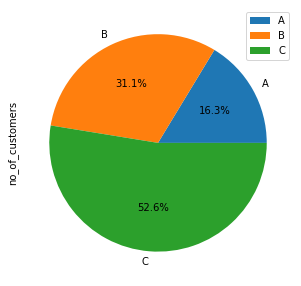

In [58]:
ph.groupby('cltv_class').agg(no_of_customers=('account','nunique')).plot.pie(y='no_of_customers', figsize=(5,5),
                                                                            autopct='%1.1f%%')
plt.show()

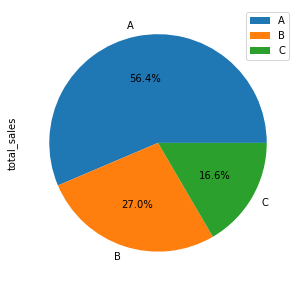

In [40]:
ph.groupby('cltv_class').agg(total_sales=('sales','sum')).plot.pie(y='total_sales', figsize=(5,5),
                                                                    autopct='%1.1f%%')
plt.show()

In [31]:
ph.to_csv('more_than_6months_ph_all_classes.csv', index=False)

In [266]:
cltv_df = tot_consol[['account','cltv_class']]

In [59]:
cty='Indonesia'
indo, cltv_indo = consolidate(cty)

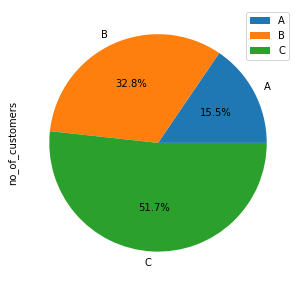

In [60]:
indo.groupby('cltv_class').agg(no_of_customers=('account','nunique')).plot.pie(y='no_of_customers', figsize=(5,5),
                                                                              autopct='%1.1f%%')
plt.show()

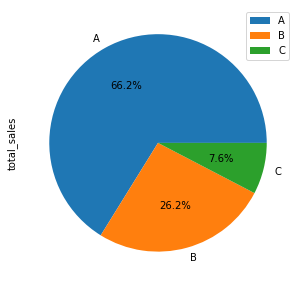

In [61]:
indo.groupby('cltv_class').agg(total_sales=('sales','sum')).plot.pie(y='total_sales', figsize=(5,5),
                                                                    autopct='%1.1f%%')
plt.show()

In [42]:
cty='Singapore'
sg = consolidate(cty)

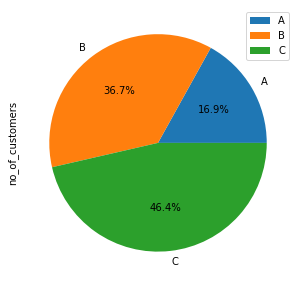

In [43]:
sg.groupby('cltv_class').agg(no_of_customers=('account','nunique')).plot.pie(y='no_of_customers', figsize=(5,5),
                                                                              autopct='%1.1f%%')
plt.show()

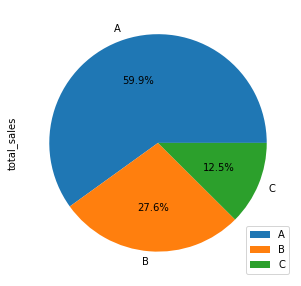

In [44]:
sg.groupby('cltv_class').agg(total_sales=('sales','sum')).plot.pie(y='total_sales', figsize=(5,5),
                                                                    autopct='%1.1f%%')
plt.show()

In [45]:
cty='Vietnam'
vt = consolidate(cty)

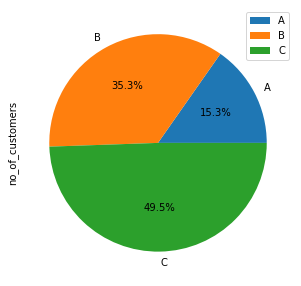

In [46]:
vt.groupby('cltv_class').agg(no_of_customers=('account','nunique')).plot.pie(y='no_of_customers', figsize=(5,5),
                                                                              autopct='%1.1f%%')
plt.show()

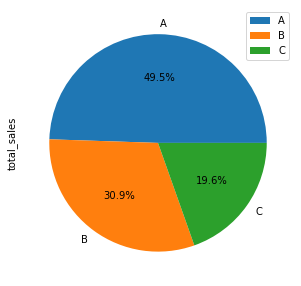

In [47]:
vt.groupby('cltv_class').agg(total_sales=('sales','sum')).plot.pie(y='total_sales', figsize=(5,5),
                                                                    autopct='%1.1f%%')
plt.show()

In [48]:
cty='Thailand'
th = consolidate(cty)

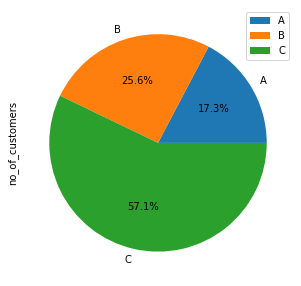

In [49]:
th.groupby('cltv_class').agg(no_of_customers=('account','nunique')).plot.pie(y='no_of_customers', figsize=(5,5),
                                                                              autopct='%1.1f%%')
plt.show()

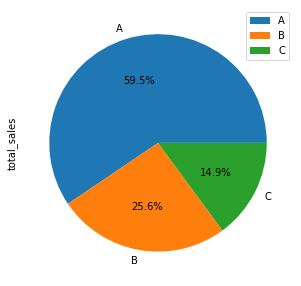

In [50]:
th.groupby('cltv_class').agg(total_sales=('sales','sum')).plot.pie(y='total_sales', figsize=(5,5),
                                                                    autopct='%1.1f%%')
plt.show()

In [51]:
cty='Malaysia'
my = consolidate(cty)

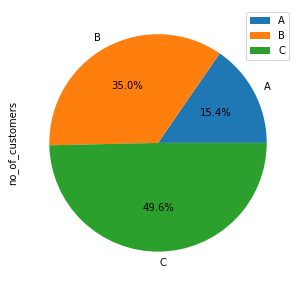

In [52]:
my.groupby('cltv_class').agg(no_of_customers=('account','nunique')).plot.pie(y='no_of_customers', figsize=(5,5),
                                                                              autopct='%1.1f%%')
plt.show()

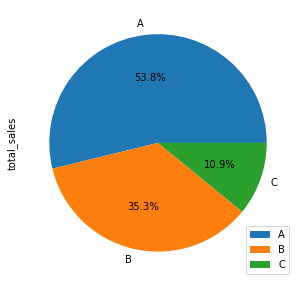

In [53]:
my.groupby('cltv_class').agg(total_sales=('sales','sum')).plot.pie(y='total_sales', figsize=(5,5),
                                                                    autopct='%1.1f%%')
plt.show()

In [41]:
temp = pd.DataFrame({'name':['john','mary','john','mary','john'],
                    'brand':['toyota','volvo','toyota','merc','toyota']})
temp

,name,brand
0,john,toyota
1,mary,volvo
2,john,toyota
3,mary,merc
4,john,toyota


In [46]:
temp.duplicated(keep=False)

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [54]:
temp[~temp.duplicated(keep=False)]

,name,brand
1,mary,volvo
3,mary,merc


In [34]:
my[['account','product_code']].duplicated()

7        False
8         True
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21        True
22        True
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30        True
168      False
169       True
170      False
203      False
204      False
205      False
206      False
207      False
208      False
238      False
239      False
262      False
263       True
264       True
265      False
266       True
267      False
268       True
269      False
270       True
271       True
272       True
273       True
274      False
275      False
276      False
277      False
278      False
279       True
280      False
281      False
282      False
283      False
284       True
285      False
286      False
287      False
288      False
289       True
290       True
291      False
292      False
293       